In [ ]:
pip install imagen-pytorch

In [ ]:

import tensorflow as tf


In [ ]:
import torch
from imagen_pytorch import Unet, Imagen

# unet for imagen

unet1 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = 3,
    layer_attns = (False, True, True, True),
    layer_cross_attns = (False, True, True, True)
)

unet2 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = (2, 4, 8, 8),
    layer_attns = (False, False, False, True),
    layer_cross_attns = (False, False, False, True)
)

# imagen, which contains the unets above (base unet and super resoluting ones)

imagen = Imagen(
    unets = (unet1, unet2),
    image_sizes = (64, 256),
    timesteps = 1000,
    cond_drop_prob = 0.1
).cuda()

# mock images (get a lot of this) and text encodings from large T5

text_embeds = torch.randn(4, 256, 768).cuda()
images = torch.randn(4, 3, 256, 256).cuda()

# feed images into imagen, training each unet in the cascade

for i in (1, 2):
    loss = imagen(images, text_embeds = text_embeds, unet_number = i)
    loss.backward()
# do the above for many many many many steps
# now you can sample an image based on the text embeddings from the cascading ddpm
images = imagen.sample(texts = [
    'a whale breaching from afar',
    'young girl blowing out candles on her birthday cake',
    'fireworks with blue and green sparkles'
], cond_scale = 5.)

images.shape # (3, 3, 256, 256)

0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([3, 3, 256, 256])

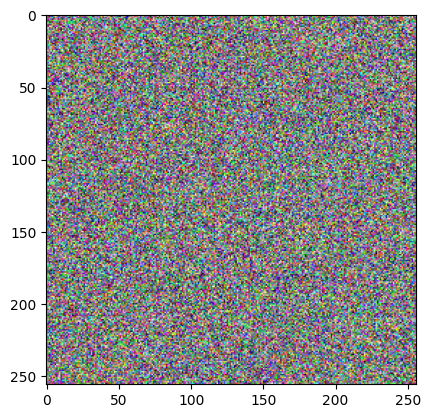

In [ ]:
out_img2=images[0].cpu().detach().numpy()
arr_ = np.squeeze(out_img2)
plt.imshow(arr_.T)
plt.show()